## 1. Walking Speed Analysis

Scatter plot of Age vs Walking Speed with Regression Line:

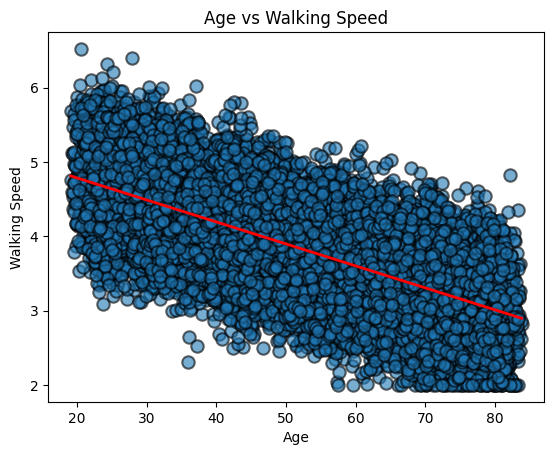

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data_file = "ms_data_insurance.csv"
df = pd.read_csv(data_file, sep=',')
sns.regplot(x='age', y='walking_speed', data=df, 
            scatter_kws={'s': 80, 'alpha': 0.6, 'edgecolor': 'black', 'linewidths': 1.5}, 
            line_kws={'color': 'red', 'lw': 2})
plt.title('Age vs Walking Speed')
plt.xlabel('Age')
plt.ylabel('Walking Speed')
plt.show()

Box plots by education level

/tmp/ipykernel_16701/1321284409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education_level', y='walking_speed', data=df, palette='Set2')


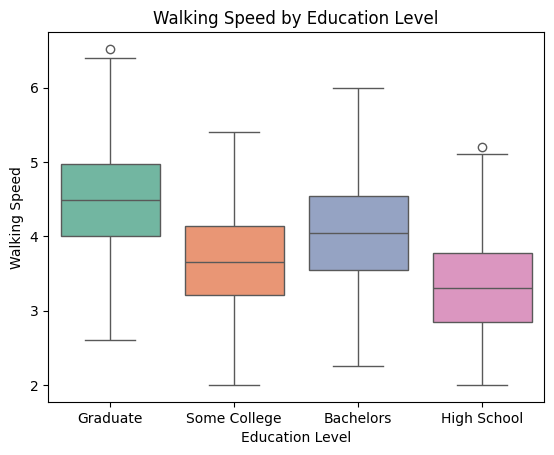

In [3]:
sns.boxplot(x='education_level', y='walking_speed', data=df, palette='Set2')
plt.title('Walking Speed by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Walking Speed')
plt.show()


Line plot showing Education x Age Interaction:

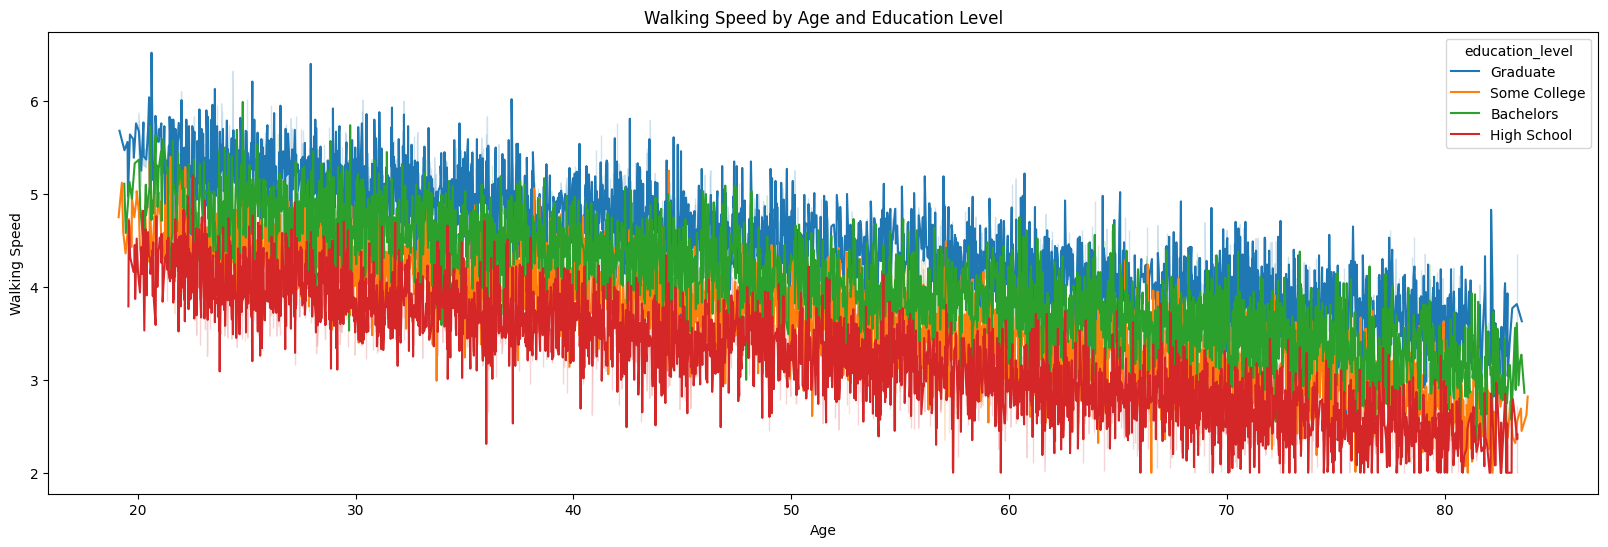

In [23]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='age', y='walking_speed', hue='education_level', data=df)
plt.title('Walking Speed by Age and Education Level')
plt.xlabel('Age')
plt.ylabel('Walking Speed')
plt.show()

## 2. Cost Analysis

Bar plot of mean costs by insurance type

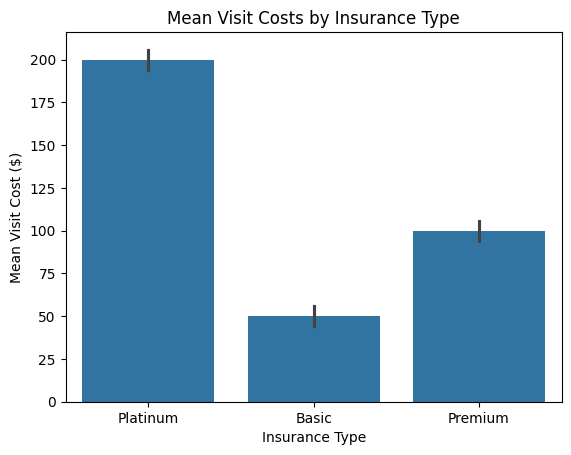

In [8]:
sns.barplot(x='insurance_type', y='visit_cost', data=df, errorbar='sd', legend=False)
plt.title('Mean Visit Costs by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Mean Visit Cost ($)')
plt.show()


Box plots showing cost distributions

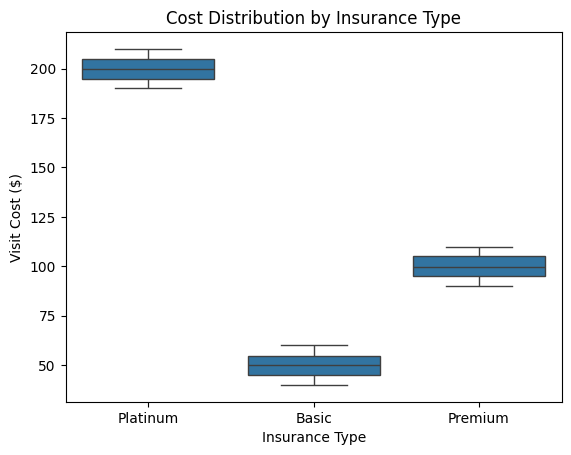

In [11]:
sns.boxplot(x='insurance_type', y='visit_cost', data=df, legend=False)
plt.title('Cost Distribution by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Visit Cost ($)')
plt.show()

## 3. Combined visualizations:

Pair plot of Key Variables (Age, Walking Speed, Visit Cost):

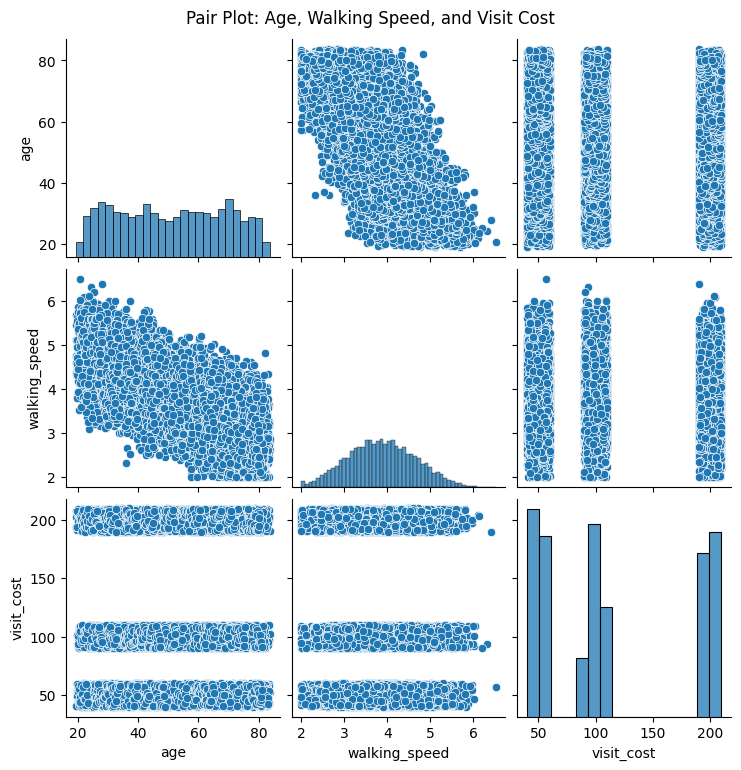

In [14]:
sns.pairplot(df[['age', 'walking_speed', 'visit_cost']])
plt.suptitle('Pair Plot: Age, Walking Speed, and Visit Cost', y=1.02)
plt.show()


Faceted plots by education/insurance

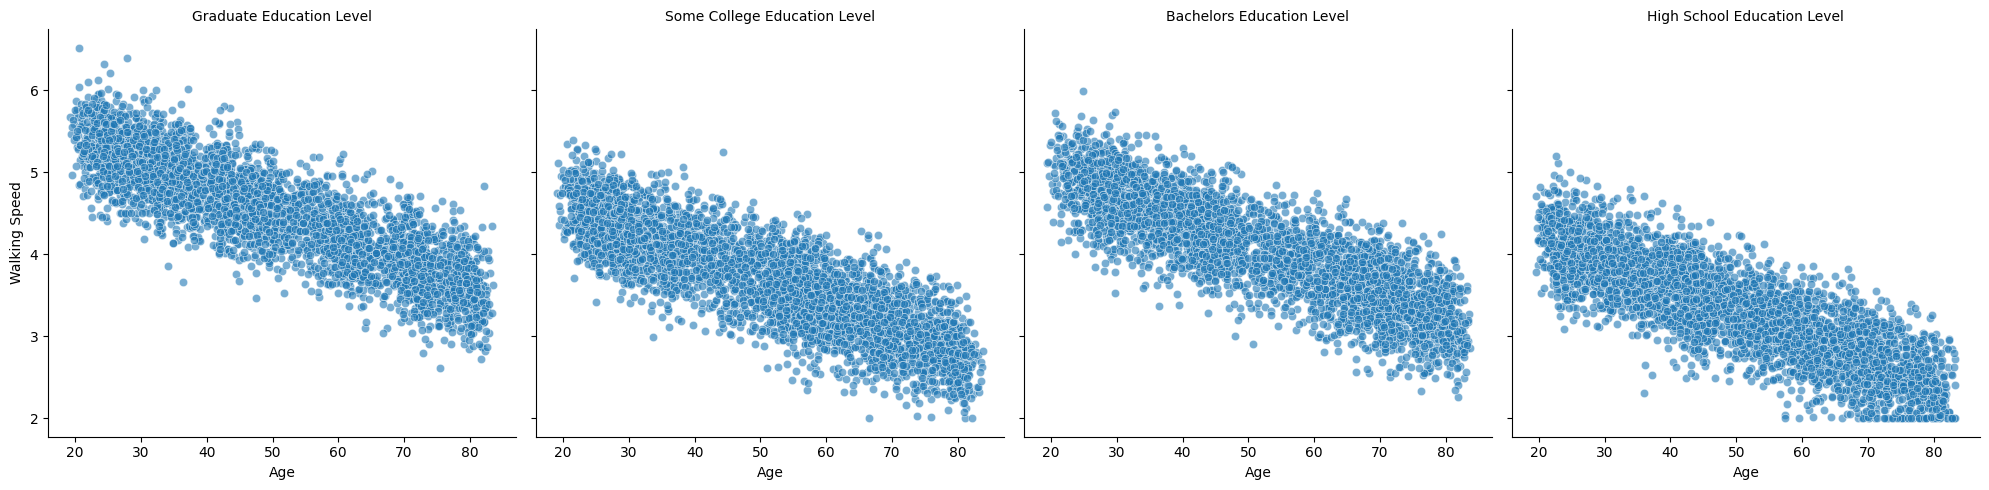

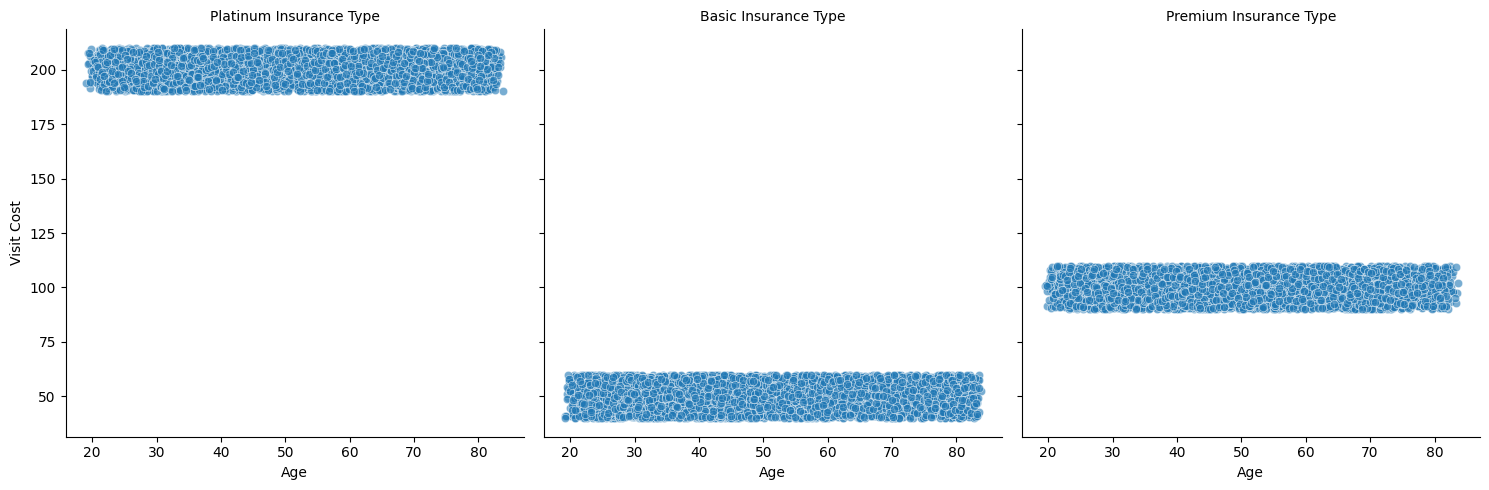

In [16]:
#by education level
g = sns.FacetGrid(df, col='education_level', height=5)
g.map(sns.scatterplot, 'age', 'walking_speed', alpha=0.6)
g.set_axis_labels('Age', 'Walking Speed')
g.set_titles('{col_name} Education Level')
plt.show()

#by insurance type
g = sns.FacetGrid(df, col='insurance_type', height=5)
g.map(sns.scatterplot, 'age', 'visit_cost', alpha=0.6)
g.set_axis_labels('Age', 'Visit Cost')
g.set_titles('{col_name} Insurance Type')
plt.show()


Time Trends for Walking Speed and Visit Costs

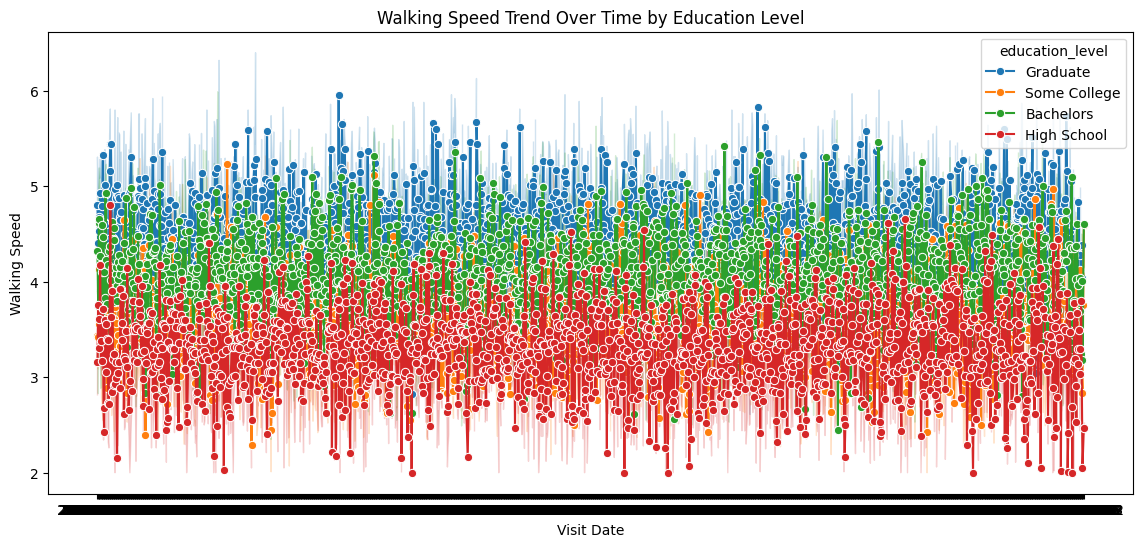

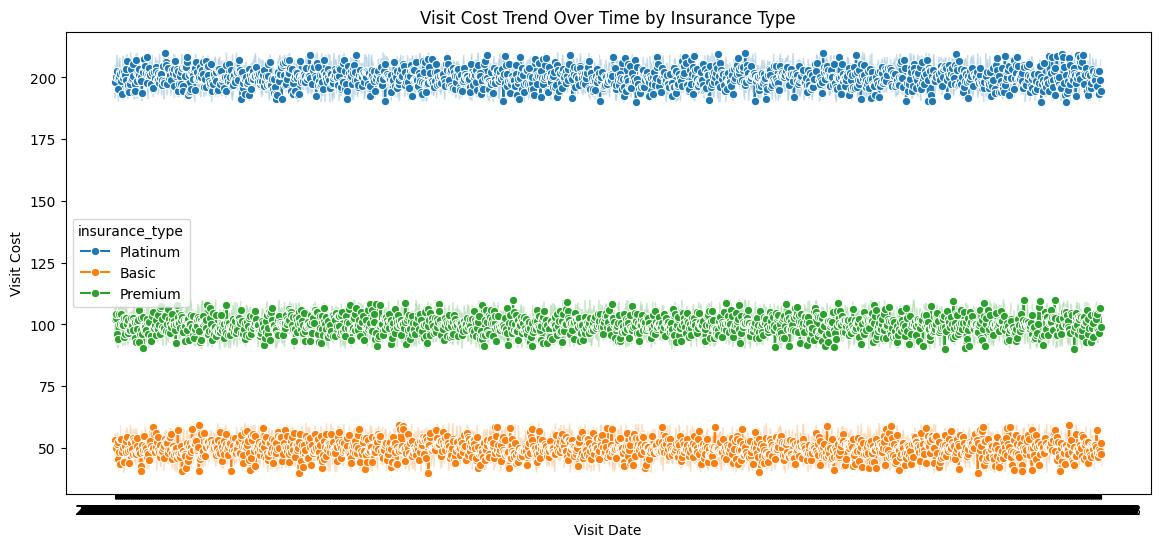

In [22]:
#walking speed over visits
plt.figure(figsize=(14, 6))
sns.lineplot(x='visit_date', y='walking_speed', data=df, hue='education_level', marker='o')
plt.title('Walking Speed Trend Over Time by Education Level')
plt.xlabel('Visit Date')
plt.ylabel('Walking Speed')
plt.show()

#visit costs over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='visit_date', y='visit_cost', data=df, hue='insurance_type', marker='o')
plt.title('Visit Cost Trend Over Time by Insurance Type')
plt.xlabel('Visit Date')
plt.ylabel('Visit Cost')
plt.show()

Bonus interactive visualizations

In [24]:
import plotly.express as px

#walking speed trend
fig = px.line(
    df, 
    x='visit_date', 
    y='walking_speed', 
    color='education_level',
    title='Walking Speed Over Time (Interactive)',
    labels={'visit_date': 'Visit Date', 'walking_speed': 'Walking Speed'}
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()
